In [1]:
import pandas as pd

# EDA

In [2]:
df = pd.read_csv("income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
numerical_data = df.select_dtypes(include="number")
numerical_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [7]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
# check imbalance in the target column income
df[" income"].value_counts()

 income
<=50K    24720
>50K      7841
Name: count, dtype: int64

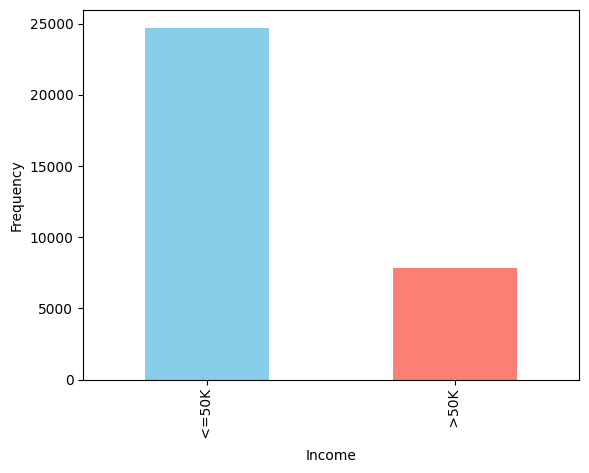

In [9]:
import matplotlib.pyplot as plt
df[" income"].value_counts().plot(kind="bar",color=['skyblue', 'salmon'])
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [10]:
categorical_data = df.select_dtypes(include="object")
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# see the distribution of the data 

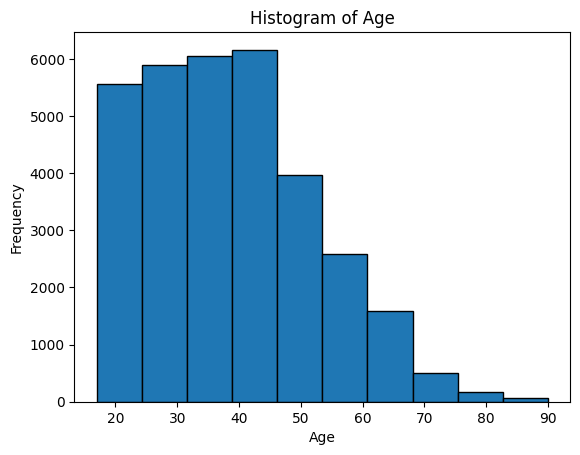

In [11]:
plt.hist(df["age"],bins=10,edgecolor="black")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

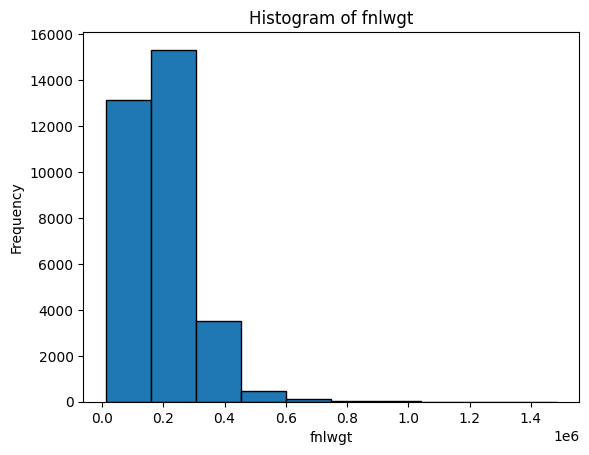

In [13]:
plt.hist(df[" fnlwgt"],bins=10,edgecolor="black")
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

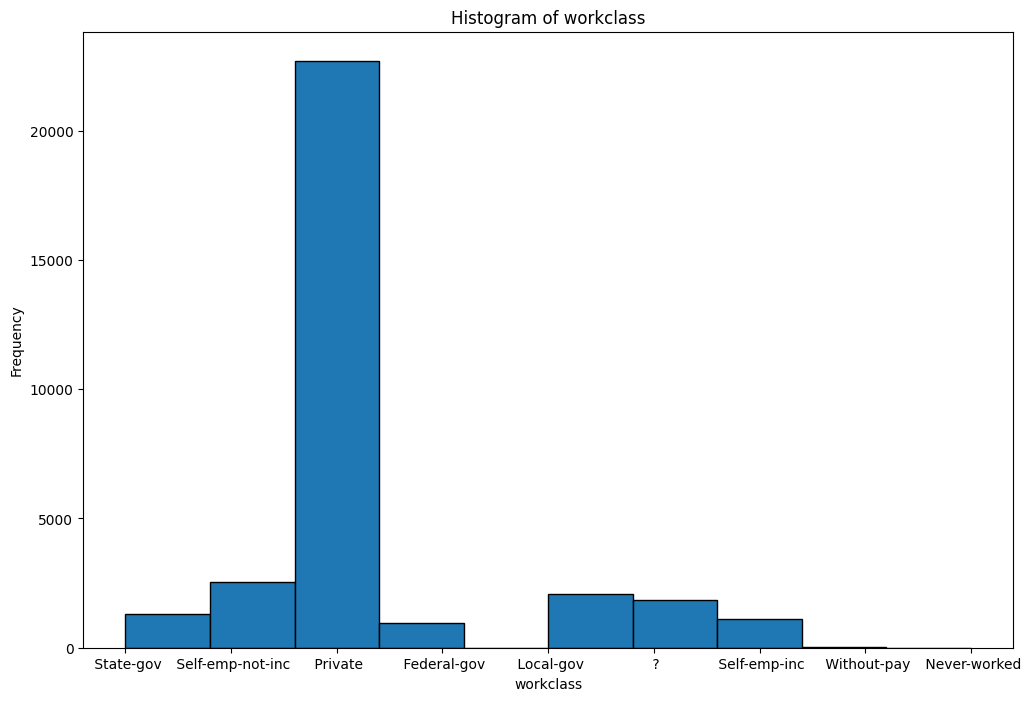

In [14]:
plt.figure(figsize=(12,8))
plt.hist(df[" workclass"],bins=10,edgecolor="black")
plt.title('Histogram of workclass')
plt.xlabel('workclass')
plt.ylabel('Frequency')
plt.show()

## check the correlation between features and the target (income)

first betweeen numerical features and the target

Kendall’s Tau (Correlation)

Kendall Tau: Indicates the strength and direction of the correlation.
P-value: Indicates statistical significance. If p-value < 0.05, the correlation is statistically significant.

In [15]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [18]:
numerical_data.columns

Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week'],
      dtype='object')

In [19]:
numerical_data=numerical_data.columns.str.strip()

In [20]:
numerical_data_df = df[numerical_data]

In [21]:
categorical_data = categorical_data.columns.str.strip()

In [22]:
from scipy.stats import kendalltau

In [23]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [24]:

# Create a copy of the income column and apply mapping to the copy (without modifying the original target column)
df['income_encoded'] = df['income'].map({' <=50K': 1, ' >50K': 2})
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,2
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1


In [25]:

# Apply Kendall's Tau on the original 'age' column and the encoded 'income_encoded' column
tau, p_value = kendalltau(df['age'], df['income_encoded'])

print("Kendall's Tau:", tau)
print("P-value:", p_value)


Kendall's Tau: 0.22523459499736104
P-value: 0.0


In [26]:
df["income"]

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [27]:
results = []
for col in numerical_data :
    if col != "income_encoded":
        tau,p_value = kendalltau(df[col],df["income_encoded"])
        results.append({"Feature":col,
                        "Kendall Tau":tau,
                        "P-value":p_value})
        
kendall_results = pd.DataFrame(results)
kendall_results


,Feature,Kendall Tau,P-value
0,age,0.225235,0.000000e+00
1,fnlwgt,-0.008767,5.268185e-02
2,education-num,0.291662,0.000000e+00
3,capital-gain,0.272671,0.000000e+00
4,capital-loss,0.139487,7.020956e-143
5,hours-per-week,0.238273,0.000000e+00


C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_24592\4117086660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kendall_results,x="Kendall Tau",y="Feature",palette="coolwarm")


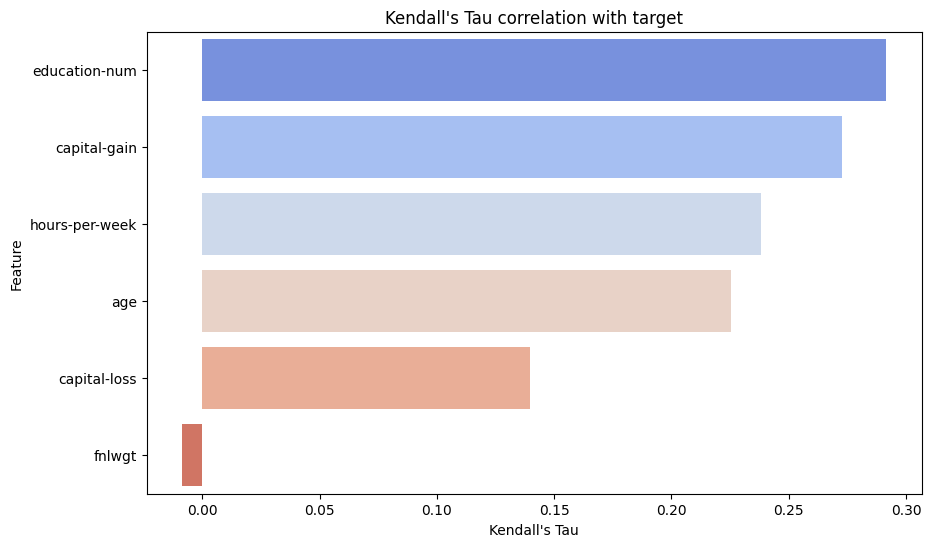

In [28]:
import seaborn as sns 
kendall_results= kendall_results.sort_values(by="Kendall Tau",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=kendall_results,x="Kendall Tau",y="Feature",palette="coolwarm")
plt.title("Kendall's Tau correlation with target")
plt.xlabel("Kendall's Tau")
plt.ylabel("Feature")
plt.show()

C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_24592\344913807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=p_value_results,x="P-value",y="Feature",palette="coolwarm")


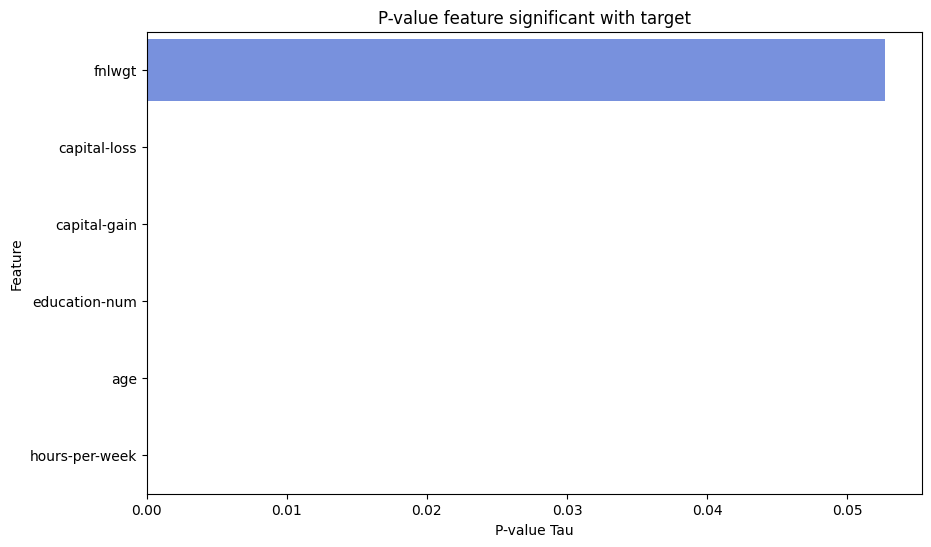

In [29]:
p_value_results= kendall_results.sort_values(by="P-value",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=p_value_results,x="P-value",y="Feature",palette="coolwarm")
plt.title("P-value feature significant with target")
plt.xlabel("P-value Tau")
plt.ylabel("Feature")
plt.show()

use spearman to insure the correlation between numerical and categorical features

In [30]:
from scipy.stats import spearmanr

results_spearman = []

for col in numerical_data:
    if col != "income_encoded":
        rho, p_value = spearmanr(df[col], df["income_encoded"])
        results_spearman.append({"Feature": col, "Spearman Rho": rho, "P-value": p_value})

spearman_results = pd.DataFrame(results_spearman).sort_values(by="P-value")
spearman_results


,Feature,Spearman Rho,P-value
0,age,0.272962,0.000000e+00
2,education-num,0.329682,0.000000e+00
3,capital-gain,0.278159,0.000000e+00
5,hours-per-week,0.269075,0.000000e+00
4,capital-loss,0.141042,2.710070e-144
1,fnlwgt,-0.010738,5.268048e-02


C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_24592\3042557712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spearman_results,x="P-value",y="Feature",palette="coolwarm")


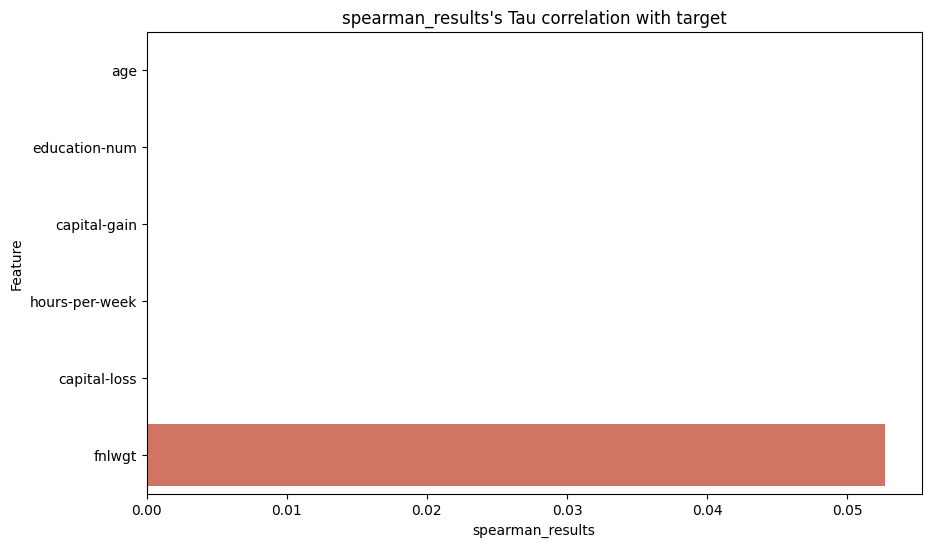

In [31]:

plt.figure(figsize=(10,6))
sns.barplot(data=spearman_results,x="P-value",y="Feature",palette="coolwarm")
plt.title("spearman_results's Tau correlation with target")
plt.xlabel("spearman_results")
plt.ylabel("Feature")
plt.show()

In [32]:
## drop fnlwgt column 
df.drop("fnlwgt",inplace=True,axis=1)

In [33]:
numerical_data

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [34]:

numerical_data_df.drop("fnlwgt",axis=1,inplace=True)

C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_24592\3282971160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_df.drop("fnlwgt",axis=1,inplace=True)


In [35]:
numerical_data_df

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


In [36]:
type(numerical_data)

pandas.core.indexes.base.Index

In [37]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'income_encoded'],
      dtype='object')

In [38]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [39]:
df['income_encoded'].unique()

array([1, 2])

In [40]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


Using Chi-Square Test

In [41]:
from scipy.stats import chi2_contingency

for col in categorical_data : 
    contingency_table = pd.crosstab(df[col],df["income"])
    chi2,p_value,dof,expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col}:\nP-Value: {p_value}\n")


Chi-Square Test for workclass:
P-Value: 2.0265054311207156e-220

Chi-Square Test for education:
P-Value: 0.0

Chi-Square Test for marital-status:
P-Value: 0.0

Chi-Square Test for occupation:
P-Value: 0.0

Chi-Square Test for relationship:
P-Value: 0.0

Chi-Square Test for race:
P-Value: 2.305960610160958e-70

Chi-Square Test for sex:
P-Value: 0.0

Chi-Square Test for native-country:
P-Value: 2.2113858852543023e-44

Chi-Square Test for income:
P-Value: 0.0



# Detect and Handle the Outliers 

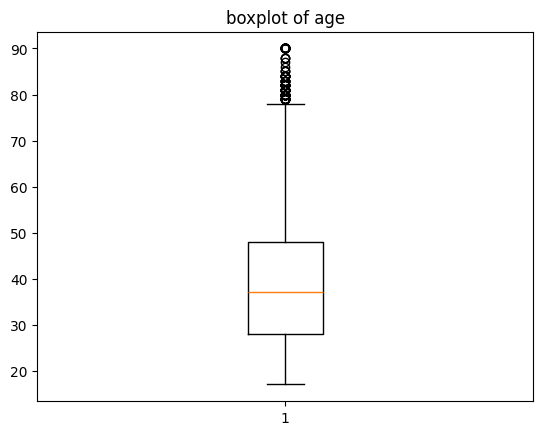

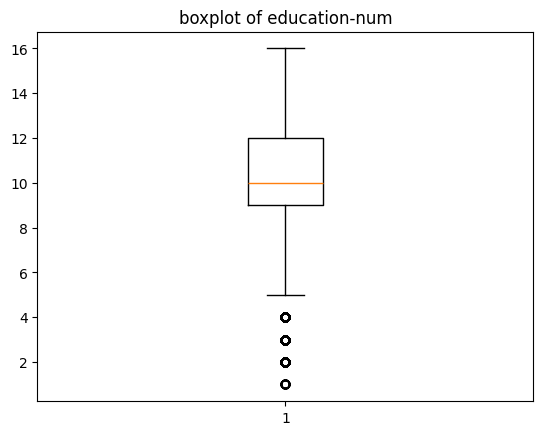

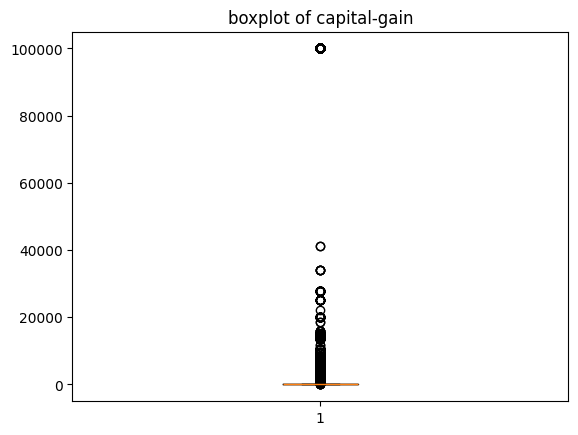

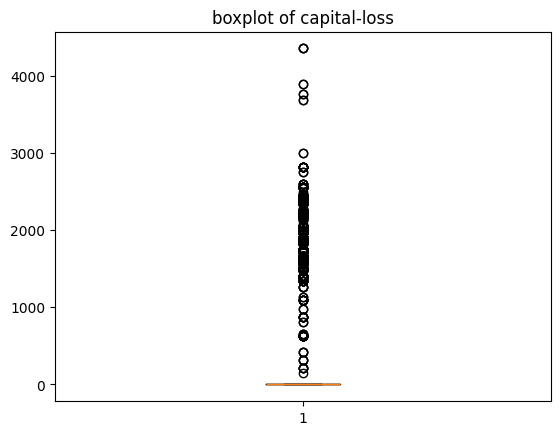

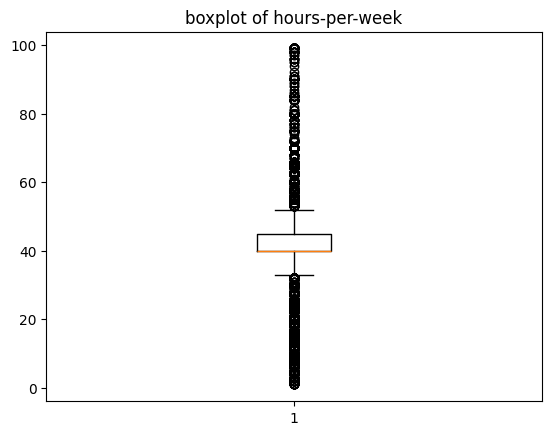

In [42]:
for col in numerical_data_df:
    plt.boxplot(df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

# Get the index of the outliers

In [43]:
for col in numerical_data_df.columns:

    Q1 = numerical_data_df[col].quantile(0.25)
    Q3 = numerical_data_df[col].quantile(0.75)
    IQR = Q3 - Q1 

    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR

    outliers = numerical_data_df[(numerical_data_df[col] < lower_whisker) | (numerical_data_df[col] > upper_whisker) ][col]
    print(f"Outliers in '{col}':")
    if not outliers.empty:
        print(outliers)
    else :
        print('No outliers found')
    
    print("-" * 40)

Outliers in 'age':
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64
----------------------------------------
Outliers in 'education-num':
15       4
56       3
61       4
79       4
160      2
        ..
32431    4
32432    1
32448    4
32479    4
32517    4
Name: education-num, Length: 1198, dtype: int64
----------------------------------------
Outliers in 'capital-gain':
0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
32515     3471
32518    99999
32538    15020
32548     1086
32560    15024
Name: capital-gain, Length: 2712, dtype: int64
----------------------------------------
Outliers in 'capital-loss':
23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
32441    1887
32443    1602
32445    1669
32458    1977
32500     880
Name: capital-loss, Length: 1519, dtype: int64
----------------------

In [44]:
def calculate_IQR(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    return IQR 

In [45]:
def lower_whisker(df, col, IQR):
    q1 = df[col].quantile(0.25)
    lower = q1 - 1.5 * IQR
    return lower

In [46]:
def upper_whisker(df, col, IQR):
    q3 = df[col].quantile(0.75)
    upper = q3 + 1.5 * IQR
    return upper

In [47]:
def detect_outliers(df, col):
    IQR_value = calculate_IQR(df, col)
    lower = lower_whisker(df, col, IQR_value)
    upper = upper_whisker(df, col, IQR_value)
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers.index

In [48]:
numerical_data_df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Use Transformation (log) for capital-gain and hours per week column

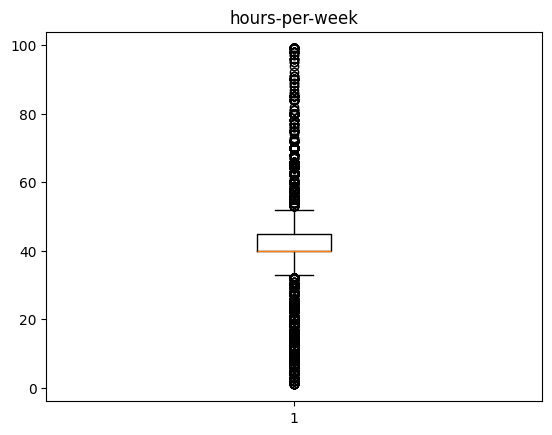

In [49]:
plt.boxplot(df["hours-per-week"])
plt.title(f"hours-per-week")
plt.show()

In [50]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'income_encoded'],
      dtype='object')

In [51]:
outliers_in_capital_gain = detect_outliers(df,col="capital-gain")
print(outliers_in_capital_gain)

Index([    0,     8,     9,    59,    60,    84,   101,   105,   106,   113,
       ...
       32399, 32434, 32462, 32466, 32473, 32515, 32518, 32538, 32548, 32560],
      dtype='int64', length=2712)


In [52]:
df.shape

(32561, 15)

In [53]:

df_cleaned = df.drop(outliers_in_capital_gain)
df_cleaned.shape

(29849, 15)

In [54]:
outliers_in_hours = detect_outliers(df_cleaned,col="hours-per-week")
outliers_in_hours

Index([    1,     6,    10,    12,    20,    21,    27,    28,    34,    37,
       ...
       32531, 32532, 32536, 32539, 32541, 32542, 32544, 32545, 32553, 32559],
      dtype='int64', length=8296)

In [55]:
df_cleaned = df.drop(outliers_in_hours)
df_cleaned.shape

(24265, 15)

In [56]:
outliers_in_education_num = detect_outliers(df_cleaned,col="education-num")

In [57]:
df_cleaned = df_cleaned.drop(outliers_in_education_num)

In [58]:
outliers_in_capital_loss = detect_outliers(df_cleaned,col="capital-loss")
df_cleaned = df_cleaned.drop(outliers_in_capital_loss)

In [59]:
outliers_in_age = detect_outliers(df_cleaned,col="age")
df_cleaned = df_cleaned.drop(outliers_in_age)

In [60]:
df_cleaned.shape

(22887, 15)

In [61]:
df_cleaned.drop("income_encoded",axis=1,inplace=True)

In [62]:
df_cleaned.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Encoding the categorical columns

In [63]:
df_cleaned.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [64]:
df_cleaned["workclass"].value_counts()

workclass
Private             16491
Local-gov            1582
Self-emp-not-inc     1425
State-gov             972
?                     926
Federal-gov           788
Self-emp-inc          694
Without-pay             5
Never-worked            4
Name: count, dtype: int64

Replace ? with NaN:

In [65]:
import numpy as np
df_cleaned["workclass"].replace(" ?",np.nan,inplace=True)
df_cleaned["workclass"].value_counts()

C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_24592\2024254680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["workclass"].replace(" ?",np.nan,inplace=True)


workclass
Private             16491
Local-gov            1582
Self-emp-not-inc     1425
State-gov             972
Federal-gov           788
Self-emp-inc          694
Without-pay             5
Never-worked            4
Name: count, dtype: int64

In [66]:
rare_categoreies_in_workclass = df_cleaned["workclass"].value_counts()[df_cleaned["workclass"].value_counts() < 679]
rare_categoreies_in_workclass

workclass
Without-pay     5
Never-worked    4
Name: count, dtype: int64

In [67]:
rare_categoreies_in_workclass.index

Index([' Without-pay', ' Never-worked'], dtype='object', name='workclass')

drop rare_categoreies_in_workclass

In [68]:
df_cleaned = df_cleaned[~df["workclass"].isin(rare_categoreies_in_workclass.index)]

C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_24592\3330248456.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~df["workclass"].isin(rare_categoreies_in_workclass.index)]


In [69]:
df_cleaned["workclass"].value_counts()

workclass
Private             16491
Local-gov            1582
Self-emp-not-inc     1425
State-gov             972
Federal-gov           788
Self-emp-inc          694
Name: count, dtype: int64

In [70]:
df_cleaned.isna().sum()

age                 0
workclass         926
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
dtype: int64

get the indecies of Nan values in workclass

In [71]:
df_cleaned[df_cleaned["workclass"].isna()].index

Index([   61,    69,   106,   128,   149,   154,   187,   201,   297,   347,
       ...
       32093, 32103, 32189, 32206, 32291, 32310, 32343, 32426, 32477, 32490],
      dtype='int64', length=926)

In [72]:
df.loc[df_cleaned[df_cleaned["workclass"].isna()].index]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,1
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,1
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,1
128,35,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K,1
149,43,?,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32310,21,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,1
32343,66,?,HS-grad,9,Widowed,?,Unmarried,White,Female,0,0,40,United-States,<=50K,1
32426,20,?,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,1
32477,49,?,12th,8,Divorced,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,1


drop Nan values 

In [73]:
df_cleaned.dropna(inplace=True)

In [74]:
df_cleaned.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

encode the workclass using one

In [75]:
workclass_encoded = pd.get_dummies(df_cleaned["workclass"],prefix="workclass",drop_first=False)


In [76]:
df_cleaned = pd.concat([df_cleaned,workclass_encoded],axis=1)
df_cleaned.drop("workclass",axis=1,inplace=True)

In [77]:
df_cleaned.head()

,age,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,False,False,False,False,True
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,False,True,False,False,False
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,False,True,False,False,False
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,False,True,False,False,False
5,37,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False,False,True,False,False,False


for education column 

In [78]:
df_cleaned["education"].value_counts()

education
HS-grad         7540
Some-college    4600
Bachelors       3860
Masters         1207
Assoc-voc       1036
Assoc-acdm       740
11th             592
10th             543
7th-8th          394
9th              358
Prof-school      349
12th             253
Doctorate        246
5th-6th          234
Name: count, dtype: int64

Use mapping

In [82]:
education_salary_mapping = {
    "Prof-school": 16,
    "Doctorate": 15,
    "Masters": 14,
    "Bachelors": 13,
    "Assoc-acdm": 12,
    "Assoc-voc": 11,
    "Some-college": 10,
    "HS-grad": 9,
    "12th": 8,
    "11th": 7,
    "10th": 6,
    "9th": 5,
    "7th-8th": 4,
    "5th-6th": 3,
    "1st-4th": 2,
    "Preschool": 1,
}

df_cleaned['education_encoded'] = df_cleaned['education'].map(education_salary_mapping)
df_cleaned[['education', 'education_encoded']]



,education,education_encoded
0,Bachelors,NaN
2,HS-grad,NaN
3,11th,NaN
4,Bachelors,NaN
5,Masters,NaN
...,...,...
32555,Some-college,NaN
32556,Assoc-acdm,NaN
32557,HS-grad,NaN
32558,HS-grad,NaN


Series([], Name: count, dtype: int64)